# Titanic Survival Prediction

This is my first kernel which is inspired by

Jerry Tseng
https://www.kaggle.com/jerrytseng/titanic-random-forest-82-78
Sina
https://www.kaggle.com/sinakhorami/titanic-best-working-classifier

This Kernel covers - 

Data Analysis,
Data Visualization,
Feature Engineering,
Model Comparision

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_palette('cool')

# Importing and Studying the Dataset

---

In [4]:
training_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [5]:
# Viewing the data

In [6]:
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
# Information on the dataset

In [9]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
# We have 7 Numeric (PassengerId, Survived, Pclass, Age, SibSp, Parch, Fare)
# and 5 categorical Features (Name, Sex, Ticket, Cabin, Embarked)

In [12]:
training_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
# Training Data contains 866 null values ( Age-177, Cabin-687, Emarked-2)

In [14]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [15]:
# Test Data contains 414 null values ( Age-86, Fare-1, Cabin-327)

---

# Exploration and Feature Engineering of the dataset

---

# Passenger Id

In [16]:
training_data.PassengerId.nunique()

# Saving the passengerId of test data for later use.
passengerId = test_data['PassengerId']

In [17]:
# Since passengerId does not have significant contribution to survival directly therefore we will Drop it.

In [18]:
training_data.drop(labels='PassengerId', axis=1, inplace=True)
test_data.drop(labels='PassengerId', axis=1, inplace=True)

In [19]:
training_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Pclass

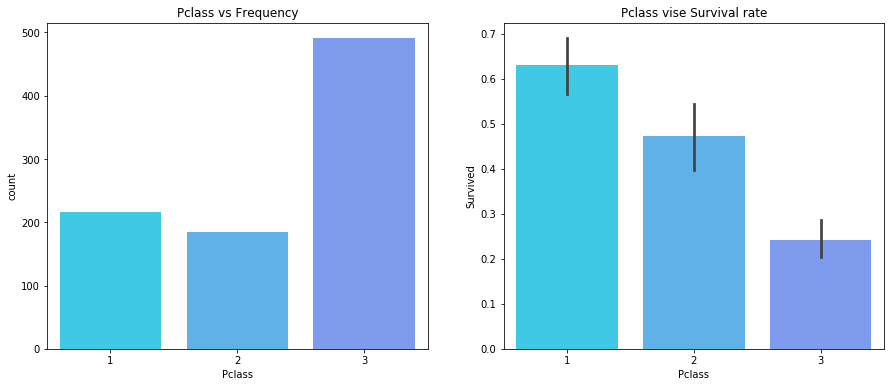

In [20]:
fx, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].set_title("Pclass vs Frequency")
axes[1].set_title("Pclass vise Survival rate")
fig1_pclass = sns.countplot(data=training_data, x='Pclass', ax=axes[0])
fig2_pclass = sns.barplot(data=training_data, x='Pclass',y='Survived', ax=axes[1])

In [21]:
print(training_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


In [22]:
# As seen the population of passengers as per Pclass is ( 3 > 1 > 2) 
# Survival percentage as per classes is ( 1 > 2 > 3)
# Inference: 1st class passengers have higher survival rate 

# Name

In [23]:
# Making a new feature Title having only the title extracted from the first name
# Making a new feature nameLength telling the length of the name

In [24]:
training_data.Name.nunique()

891

In [25]:
# Title Feature

training_data['Title'] = training_data['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
test_data['Title'] = test_data['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])

# Name Leangth
training_data['Name_Len'] = training_data['Name'].apply(lambda x: len(x))
test_data['Name_Len'] = test_data['Name'].apply(lambda x: len(x))

# Dropping the name feature 

training_data.drop(labels='Name', axis=1, inplace=True)
test_data.drop(labels='Name', axis=1, inplace=True)

In [26]:
# Categorizing the name length by simply dividing it with 10.

test_data.Name_Len = (test_data.Name_Len/10).astype(np.int64)+1
training_data.Name_Len = (training_data.Name_Len/10).astype(np.int64)+1

In [27]:
print (training_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())

        Title  Survived
0       Capt.  0.000000
1        Col.  0.500000
2        Don.  0.000000
3         Dr.  0.428571
4   Jonkheer.  0.000000
5       Lady.  1.000000
6      Major.  0.500000
7     Master.  0.575000
8       Miss.  0.697802
9       Mlle.  1.000000
10       Mme.  1.000000
11        Mr.  0.156673
12       Mrs.  0.792000
13        Ms.  1.000000
14       Rev.  0.000000
15       Sir.  1.000000
16        the  1.000000


In [28]:
print (training_data[['Name_Len', 'Survived']].groupby(['Name_Len'], as_index=False).mean())

   Name_Len  Survived
0         2  0.220588
1         3  0.331776
2         4  0.493827
3         5  0.750000
4         6  0.800000
5         7  1.000000
6         9  1.000000


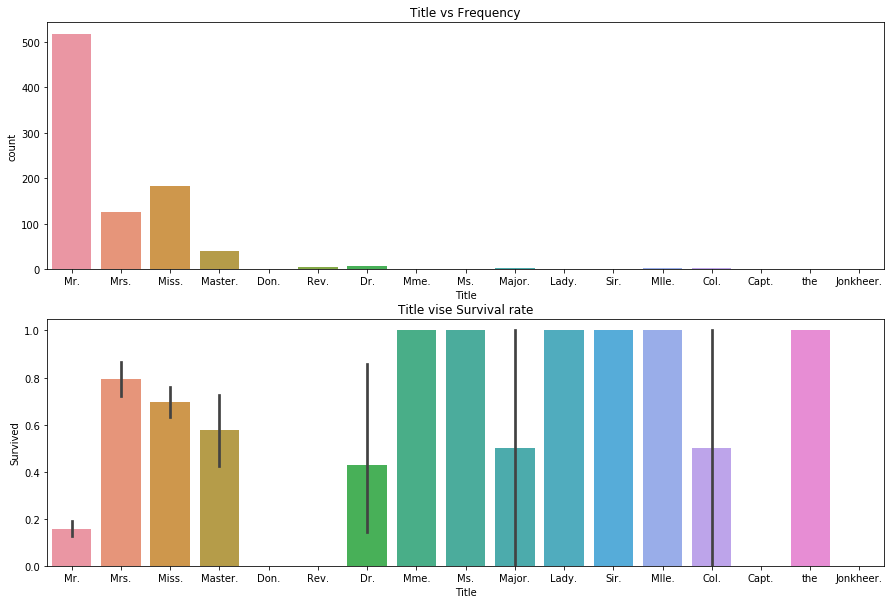

In [29]:
fx, axes = plt.subplots(2, 1, figsize=(15, 10))
axes[0].set_title("Title vs Frequency")
axes[1].set_title("Title vise Survival rate")
fig1_title = sns.countplot(data=training_data, x='Title', ax=axes[0])
fig2_title = sns.barplot(data=training_data, x='Title',y='Survived', ax=axes[1])

In [30]:
# Observations
# Name length as seen the longer the name the higher is the survival.
# Titles like Mrs. Ms. the lady or any royalty have high survival rates.

# Gender

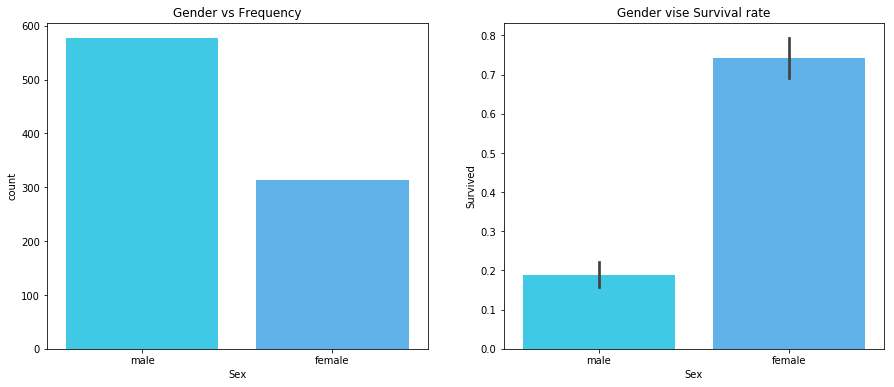

In [31]:
fx, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].set_title("Gender vs Frequency")
axes[1].set_title("Gender vise Survival rate")
fig1_gen = sns.countplot(data=training_data, x='Sex', ax=axes[0])
fig2_gen = sns.barplot(data=training_data, x='Sex', y='Survived', ax=axes[1])

In [32]:
print(training_data[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean())

      Sex  Survived
0  female  0.742038
1    male  0.188908


In [33]:
# As can be seen that (number of males > number of females) but Survival ratio is inverse
# More females survived as compared to males

# Age

In [34]:
training_data.Age.isnull().sum()

# Creating a list of age values without null values
training_age_n = training_data.Age.dropna(axis=0)

In [35]:
# Age contains 177 null values in training set and 86 in test set

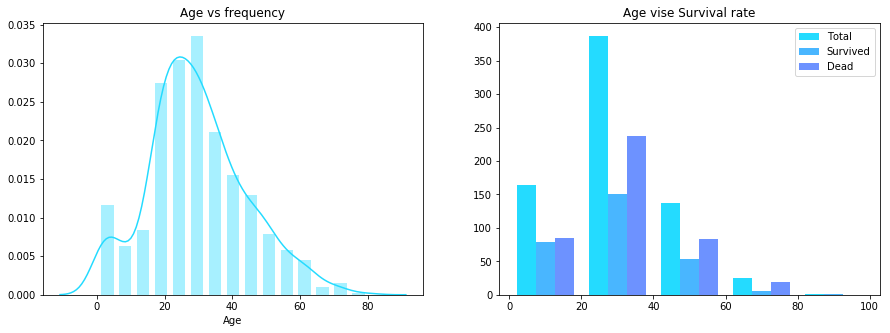

In [36]:
fx, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].set_title("Age vs frequency")
axes[1].set_title("Age vise Survival rate")
fig1_age = sns.distplot(a=training_age_n, bins=15, ax=axes[0], hist_kws={'rwidth':0.7})

# Creating a new list of survived and dead

pass_survived_age = training_data[training_data.Survived == 1].Age
pass_dead_age = training_data[training_data.Survived == 0].Age

axes[1].hist([training_data.Age, pass_survived_age, pass_dead_age], bins=5, range=(0, 100), label=['Total', 'Survived', 'Dead'])
axes[1].legend()
plt.show()

In [37]:
# Taking care of null values in Age 
full_data = pd.concat([training_data, test_data])

In [38]:
# Null Ages in Training set (177 null values)
train_age_mean = full_data.Age.mean()
train_age_std = full_data.Age.std()
train_age_null = training_data.Age.isnull().sum()
rand_tr_age = np.random.randint(train_age_mean - train_age_std, train_age_mean + train_age_std, size=train_age_null)
training_data['Age'][np.isnan(training_data['Age'])] = rand_tr_age
training_data['Age'] = training_data['Age'].astype(int) + 1

# Null Ages in Test set (86 null values)
test_age_mean = full_data.Age.mean()
test_age_std = full_data.Age.std()
test_age_null = test_data.Age.isnull().sum()
rand_ts_age = np.random.randint(test_age_mean - test_age_std, test_age_mean + test_age_std, size=test_age_null)
test_data['Age'][np.isnan(test_data['Age'])] = rand_ts_age
test_data['Age'] = test_data['Age'].astype(int)

training_data.Age = (training_data.Age/15).astype(np.int64)
test_data.Age = (test_data.Age/15).astype(np.int64) + 1

In [39]:
print(training_data[['Age', 'Survived']].groupby(['Age'], as_index = False).mean())

   Age  Survived
0    0  0.591549
1    1  0.349206
2    2  0.383648
3    3  0.406250
4    4  0.230769
5    5  0.500000


In [40]:
# Observations:
# Maximum passengers have age between 20-40 years
# Survival rate is maximum for childrens and elderly

# SibSp and Parch 

In [41]:
# We will create a new feature of family size = SibSp + Parch + 1

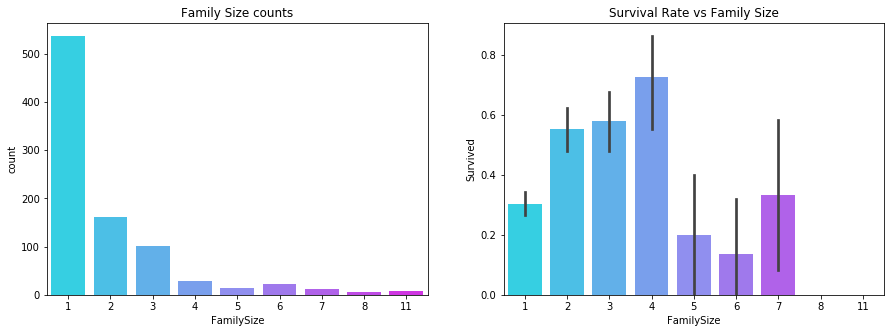

In [42]:
training_data['FamilySize'] = training_data['SibSp'] + training_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1
fx, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].set_title('Family Size counts')
axes[1].set_title('Survival Rate vs Family Size')
fig1_family = sns.countplot(x=training_data.FamilySize, ax=axes[0], palette='cool')
fig2_family = sns.barplot(x=training_data.FamilySize, y=training_data.Survived, ax=axes[1], palette='cool')

In [43]:
print(training_data[['FamilySize', 'Survived']].groupby(training_data['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0         1.0  0.303538
1         2.0  0.552795
2         3.0  0.578431
3         4.0  0.724138
4         5.0  0.200000
5         6.0  0.136364
6         7.0  0.333333
7         8.0  0.000000
8        11.0  0.000000


In [44]:
# As observed maximum passengers are alone but the survival is maximum for the family of 4

# isAlone 

In [45]:
# wheather or not the passenger was alone ?

training_data['isAlone'] = training_data['FamilySize'].map(lambda x: 1 if x == 1 else 0)
test_data['isAlone'] = test_data['FamilySize'].map(lambda x: 1 if x == 1 else 0)

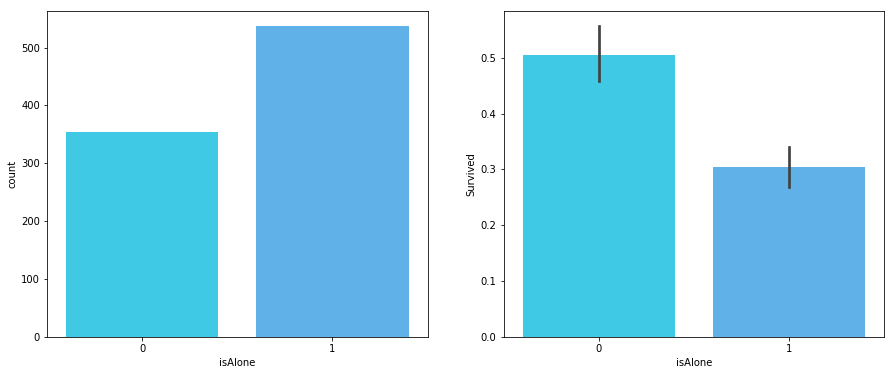

In [46]:
fx, axes = plt.subplots(1, 2, figsize=(15, 6))
fig1_alone = sns.countplot(data=training_data, x='isAlone', ax=axes[0])
fig2_alone = sns.barplot(data=training_data, x='isAlone', y='Survived', ax=axes[1])

In [47]:
training_data.drop(labels=['SibSp', 'Parch'], axis=1, inplace=True)
test_data.drop(labels=['SibSp', 'Parch'], axis=1, inplace=True)
training_data.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,Name_Len,FamilySize,isAlone
0,0,3,male,1,A/5 21171,7.2500,NaN,S,Mr.,3,2,0
1,1,1,female,2,PC 17599,71.2833,C85,C,Mrs.,6,2,0
2,1,3,female,1,STON/O2. 3101282,7.9250,NaN,S,Miss.,3,1,1
3,1,1,female,2,113803,53.1000,C123,S,Mrs.,5,2,0
4,0,3,male,2,373450,8.0500,NaN,S,Mr.,3,1,1


In [48]:
# Observations:
#The maximum passengers are alone but survival rate is highest for the family of 3-4

# Ticket

In [49]:
# Making a new feature ticket length

training_data['Ticket_Len'] = training_data['Ticket'].apply(lambda x: len(x))
test_data['Ticket_Len'] = test_data['Ticket'].apply(lambda x: len(x))

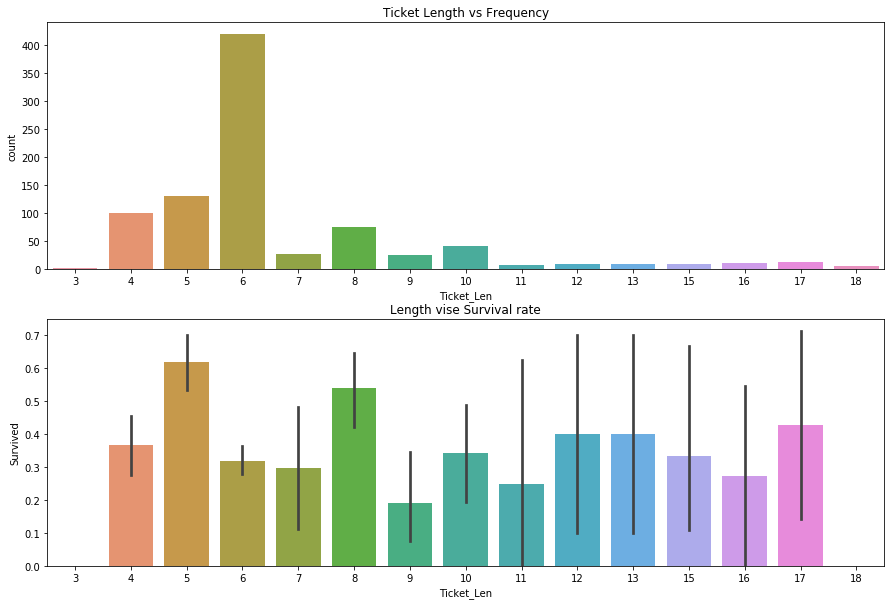

In [50]:
fx, axes = plt.subplots(2, 1, figsize=(15, 10))
axes[0].set_title("Ticket Length vs Frequency")
axes[1].set_title("Length vise Survival rate")
fig1_tlen = sns.countplot(data=training_data, x='Ticket_Len', ax=axes[0])
fig2_tlen = sns.barplot(data=training_data, x='Ticket_Len',y='Survived', ax=axes[1])

In [51]:
print(training_data[['Ticket_Len', 'Survived']].groupby(training_data['Ticket_Len'], as_index=False).mean())

    Ticket_Len  Survived
0          3.0  0.000000
1          4.0  0.366337
2          5.0  0.618321
3          6.0  0.319809
4          7.0  0.296296
5          8.0  0.539474
6          9.0  0.192308
7         10.0  0.341463
8         11.0  0.250000
9         12.0  0.400000
10        13.0  0.400000
11        15.0  0.333333
12        16.0  0.272727
13        17.0  0.428571
14        18.0  0.000000


In [52]:
training_data.drop(labels='Ticket', axis=1, inplace=True)
test_data.drop(labels='Ticket', axis=1, inplace=True)
training_data.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Name_Len,FamilySize,isAlone,Ticket_Len
0,0,3,male,1,7.2500,NaN,S,Mr.,3,2,0,9
1,1,1,female,2,71.2833,C85,C,Mrs.,6,2,0,8
2,1,3,female,1,7.9250,NaN,S,Miss.,3,1,1,16
3,1,1,female,2,53.1000,C123,S,Mrs.,5,2,0,6
4,0,3,male,2,8.0500,NaN,S,Mr.,3,1,1,6


In [53]:
# Having ticket length may or may not increase acuracy as its not significant, in my case it did increase accuracy.

# Fare

In [54]:
# Fare has 0 null values in training data but 1 null values in test data

test_data.Fare.describe()

# mean of fare in test data is 35 we will replace nul value with mean
test_data['Fare'][np.isnan(test_data['Fare'])] = test_data.Fare.mean()

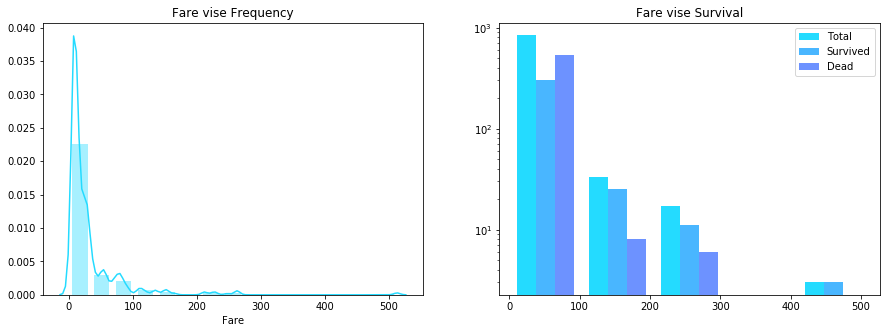

In [55]:
fx, axes = plt.subplots(1, 2, figsize=(15,5))
fig1_fare = sns.distplot(a=training_data.Fare, bins=15, ax=axes[0], hist_kws={'rwidth':0.7})
fig1_fare.set_title('Fare vise Frequency')

# Creating a new list of survived and dead

pass_survived_fare = training_data[training_data.Survived == 1].Fare
pass_dead_fare = training_data[training_data.Survived == 0].Fare

axes[1].hist(x=[training_data.Fare, pass_survived_fare, pass_dead_fare], bins=5, label=['Total', 'Survived', 'Dead'], \
        log=True)
axes[1].legend()
axes[1].set_title('Fare vise Survival')
plt.show()

In [56]:
# Categorizing the fare value by dividing it with 20 simply

training_data.Fare = (training_data.Fare /20).astype(np.int64) + 1 
test_data.Fare = (test_data.Fare /20).astype(np.int64) + 1 

In [57]:
print(training_data[['Fare','Survived']].groupby(['Fare'], as_index = False).mean())

    Fare  Survived
0      1  0.277670
1      2  0.430000
2      3  0.574074
3      4  0.500000
4      5  0.869565
5      6  0.636364
6      7  0.909091
7      8  0.666667
8      9  1.000000
9     11  0.750000
10    12  0.600000
11    13  0.500000
12    14  0.666667
13    26  1.000000


In [58]:
training_data.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Name_Len,FamilySize,isAlone,Ticket_Len
0,0,3,male,1,1,NaN,S,Mr.,3,2,0,9
1,1,1,female,2,4,C85,C,Mrs.,6,2,0,8
2,1,3,female,1,1,NaN,S,Miss.,3,1,1,16
3,1,1,female,2,3,C123,S,Mrs.,5,2,0,6
4,0,3,male,2,1,NaN,S,Mr.,3,1,1,6


In [59]:
# Observations:
# The most frequent fare is between 0-100
# The survival rate is directly praportional to rate i.e. higher the rate higher the survival chances.

# Cabin

In [60]:
# Null values in test data
cabin_null = float(test_data.Cabin.isnull().sum())
print(cabin_null/len(test_data) *100)

78.2296650718


In [61]:
# Null values in training data
cabin_null = float(training_data.Cabin.isnull().sum())
print(cabin_null/len(training_data) *100)

77.1043771044


In [62]:
# Making a new feature hasCabin which is 1 if cabin is available else 0
training_data['hasCabin'] = training_data.Cabin.notnull().astype(int)
test_data['hasCabin'] = test_data.Cabin.notnull().astype(int)

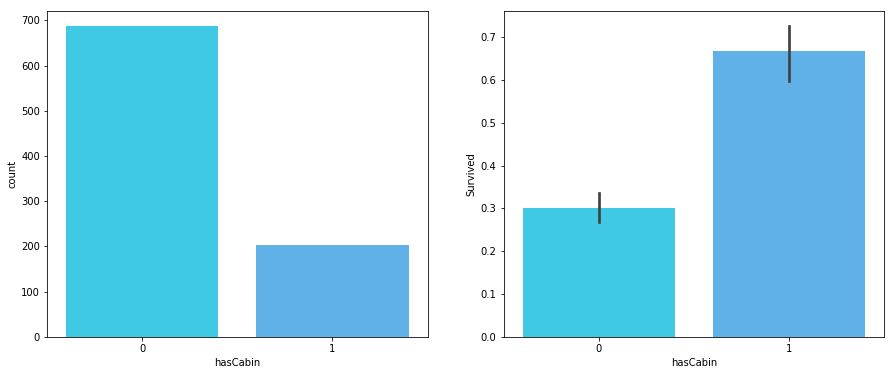

In [63]:
fx, axes = plt.subplots(1, 2, figsize=(15, 6))
fig1_hascabin = sns.countplot(data=training_data, x='hasCabin', ax=axes[0])
fig2_hascabin = sns.barplot(data=training_data, x='hasCabin', y='Survived', ax=axes[1])

In [64]:
training_data.drop(labels='Cabin', axis=1, inplace=True)
training_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Name_Len,FamilySize,isAlone,Ticket_Len,hasCabin
0,0,3,male,1,1,S,Mr.,3,2,0,9,0
1,1,1,female,2,4,C,Mrs.,6,2,0,8,1
2,1,3,female,1,1,S,Miss.,3,1,1,16,0
3,1,1,female,2,3,S,Mrs.,5,2,0,6,1
4,0,3,male,2,1,S,Mr.,3,1,1,6,0


In [65]:
test_data.drop(labels='Cabin', axis=1, inplace=True)
test_data.head()

,Pclass,Sex,Age,Fare,Embarked,Title,Name_Len,FamilySize,isAlone,Ticket_Len,hasCabin
0,3,male,3,1,Q,Mr.,2,1,1,6,0
1,3,female,4,1,S,Mrs.,4,2,0,6,0
2,2,male,5,1,Q,Mr.,3,1,1,6,0
3,3,male,2,1,S,Mr.,2,1,1,6,0
4,3,female,2,1,S,Mrs.,5,3,0,7,0


In [66]:
# As observed maximum population on titanic dataset does not have cabin but survival for having cabin is more.

# Embarked

In [67]:
# Embarked has 2 null values in the training data

In [68]:
training_data.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [69]:
# Since "S" is the most frequent class constituting 72% of the total therefore we will replace null values with "S"

In [70]:
training_data['Embarked'] = training_data['Embarked'].fillna('S')

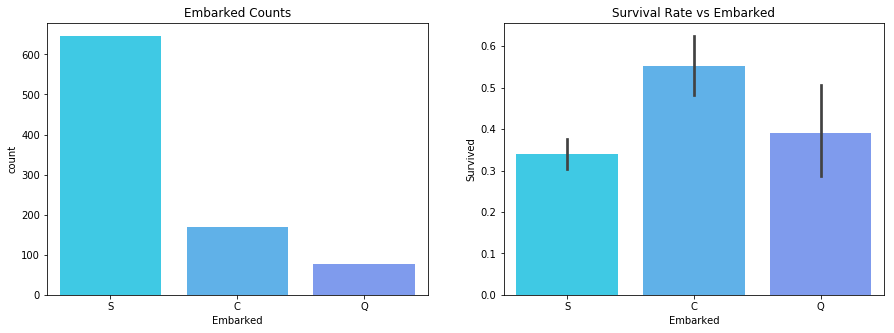

In [71]:
fx, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].set_title('Embarked Counts')
axes[1].set_title('Survival Rate vs Embarked')
fig1_embarked = sns.countplot(x=training_data.Embarked, ax=axes[0])
fig2_embarked = sns.barplot(x=training_data.Embarked, y=training_data.Survived, ax=axes[1])

In [72]:
print(training_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean())

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


In [73]:
# Observations:
# The maximum passengers are from Southampton
# The maximum survival rate is of the passengers who boarded from Cherbourg

In [74]:
print(training_data[['Embarked', 'Fare']].groupby(['Embarked'], as_index = False).mean())

  Embarked      Fare
0        C  3.470238
1        Q  1.233766
2        S  1.893189


In [75]:
# If we observe the fare as grouped by boarding ststion 
# we observe that the most premium customers boarded from Cherbourg therefore maximum survival rate .

---

# Cleaning the data for Classification

In [76]:
# Splitting the dataset into dependent and independent features
training_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Name_Len,FamilySize,isAlone,Ticket_Len,hasCabin
0,0,3,male,1,1,S,Mr.,3,2,0,9,0
1,1,1,female,2,4,C,Mrs.,6,2,0,8,1
2,1,3,female,1,1,S,Miss.,3,1,1,16,0
3,1,1,female,2,3,S,Mrs.,5,2,0,6,1
4,0,3,male,2,1,S,Mr.,3,1,1,6,0


In [77]:
X = training_data.iloc[:, 1:12].values
y = training_data.iloc[:, 0].values

In [78]:
# Resolving the categorical data for training set

In [79]:
label_encoder_sex_tr = LabelEncoder()
label_encoder_title_tr = LabelEncoder()
label_encoder_embarked_tr = LabelEncoder()
X[:, 1] = label_encoder_sex_tr.fit_transform(X[:, 1])
X[:, 5] = label_encoder_title_tr.fit_transform(X[:, 5])
X[:, 4] = label_encoder_embarked_tr.fit_transform(X[:, 4])


In [80]:
# Splitting the dataset into training and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [81]:
# Feature Scaling

scaler_x = MinMaxScaler((-1,1))
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)


# Classifier Model Comparision

In [82]:
# Making a list of accuracies
accuracies = []

# Logistic Regression

In [83]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [84]:
lr_score = classifier.score(X_test, y_test)
accuracies.append(lr_score)
print(lr_score)

0.821229050279


# SVM

In [85]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [86]:
svm_score = svm.score(X_test, y_test)
accuracies.append(svm_score)
print(svm_score)

0.798882681564


# Kernel SVM

In [87]:
k_svm = SVC(kernel='rbf')
k_svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [88]:
k_svm_score = k_svm.score(X_test, y_test)
accuracies.append(k_svm_score)
print(k_svm_score)

0.810055865922


# K- Nearest Neighbours KNN

In [89]:
knn = KNeighborsClassifier(p=2, n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [90]:
knn_score = knn.score(X_test, y_test)
accuracies.append(knn_score)
print(knn_score)

0.810055865922


# Random Forest

In [91]:
rdmf = RandomForestClassifier(n_estimators=25, criterion='entropy')
rdmf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [92]:
rdmf_score = rdmf.score(X_test, y_test)
rdmf_score_tr = rdmf.score(X_train, y_train)
accuracies.append(rdmf_score)
print(rdmf_score)
print(rdmf_score_tr)

0.821229050279
0.946629213483


# XgBoost

In [93]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [94]:
xgb_score = xgb.score(X_test, y_test)
accuracies.append(xgb_score)
print(xgb_score)

0.821229050279


In [95]:
myLabels = ['Logistic Regression', 'SVM', 'Kernel SVM', 'KNN', 'Random Forest', 'Xgboost']

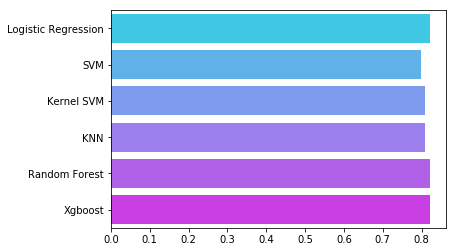

In [96]:
fig1_accu= sns.barplot(x=accuracies, y=myLabels)

In [97]:
# As observed Xgboost performs best.
# We will be making three submissions
# Random Forest
# K-Svm
# Xgboost
# Since Random Forest scores best after submission we will apply Grid Search CV on RF

In [ ]:
# Applying Grid search cv for Parameter Tuning of Random Forest

from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(max_features='auto')

param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10, 12], "n_estimators": [50, 100, 400, 700]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

gs = gs.fit(X, y)

print(gs.best_score_)
print(gs.best_params_)

# Making the Prediction

In [98]:
# Preparing test data 
test_data['Title'] = test_data['Title'].replace('Dona.', 'Mrs.')
test_data.head()

,Pclass,Sex,Age,Fare,Embarked,Title,Name_Len,FamilySize,isAlone,Ticket_Len,hasCabin
0,3,male,3,1,Q,Mr.,2,1,1,6,0
1,3,female,4,1,S,Mrs.,4,2,0,6,0
2,2,male,5,1,Q,Mr.,3,1,1,6,0
3,3,male,2,1,S,Mr.,2,1,1,6,0
4,3,female,2,1,S,Mrs.,5,3,0,7,0


In [99]:
titanic_test = test_data.iloc[:, 0:11].values

In [100]:
# Taking care of categorical data

titanic_test[:, 1] = label_encoder_sex_tr.transform(titanic_test[:, 1])
titanic_test[:, 5] = label_encoder_title_tr.transform(titanic_test[:, 5])
titanic_test[:, 4] = label_encoder_embarked_tr.transform(titanic_test[:, 4])

In [101]:
# Feature Scaling

titanic_test = scaler_x.transform(titanic_test)

In [102]:
y_pred = classifier.predict(titanic_test)

In [103]:
len(y_pred)

418

In [104]:
titanic_submission = pd.DataFrame({'PassengerId':passengerId, 'Survived':y_pred})

In [105]:
titanic_submission.to_csv('lr_Titanic.csv', index=False)

# Thanks for Viewing this kernel feel free to ask or suggest.